In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [116]:
df = pd.read_csv("davis.csv")
samp = df["waight"]

(array([ 5., 16., 51., 39., 31., 20., 17., 10.,  5.,  3.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 39.  ,  45.35,  51.7 ,  58.05,  64.4 ,  70.75,  77.1 ,  83.45,
         89.8 ,  96.15, 102.5 , 108.85, 115.2 , 121.55, 127.9 , 134.25,
        140.6 , 146.95, 153.3 , 159.65, 166.  ]),
 <a list of 20 Patch objects>)

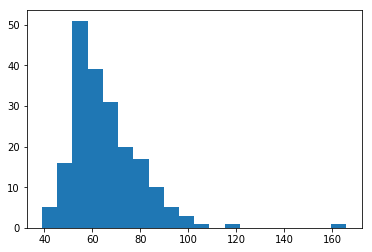

In [130]:
plt.hist(samp, bins=20)

In [131]:
N = len(samp)
mu = samp.mean()
si = samp.std()*(N-1)/N

In [132]:
kmo = (mu/si)**2
smo = si**2/mu

print("kmo = {}, smo = {}".format(kmo, smo))

kmo = 19.289270031015267, smo = 3.411222917933131


In [133]:
from scipy import stats
# floc=0 の時 Rで使うfitdistr 関数の結果と同じになる
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(np.array(samp), floc=0)
print(fit_alpha, fit_loc, fit_beta)

22.48530359200564 0 2.926355863097812


In [134]:
print("kml = {}, sml = {}".format(fit_alpha, fit_beta))
kml = fit_alpha
sml = fit_beta

kml = 22.48530359200564, sml = 2.926355863097812


(array([ 3.,  8., 33., 40., 33., 25., 19., 12., 10.,  8.,  4.,  2.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 39.        ,  44.29166667,  49.58333333,  54.875     ,
         60.16666667,  65.45833333,  70.75      ,  76.04166667,
         81.33333333,  86.625     ,  91.91666667,  97.20833333,
        102.5       , 107.79166667, 113.08333333, 118.375     ,
        123.66666667, 128.95833333, 134.25      , 139.54166667,
        144.83333333, 150.125     , 155.41666667, 160.70833333,
        166.        ]),
 <a list of 24 Patch objects>)

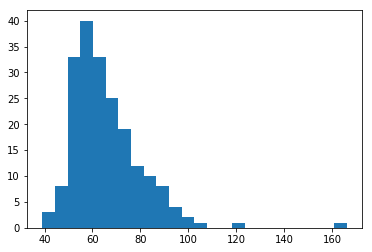

In [136]:
weight = list(df["weight"].values)
plt.hist(weight, bins=24)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00283465, 0.00755906, 0.0311811 , 0.03779528, 0.0311811 ,
        0.02362205, 0.01795276, 0.01133858, 0.00944882, 0.00755906,
        0.00377953, 0.00188976, 0.00094488, 0.        , 0.        ,
        0.00094488, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00094488]),
 array([ 39.        ,  44.29166667,  49.58333333,  54.875     ,
         60.16666667,  65.45833333,  70.75      ,  76.04166667,
         81.33333333,  86.625     ,  91.91666667,  97.20833333,
        102.5       , 107.79166667, 113.08333333, 118.375     ,
        123.66666667, 128.95833333, 134.25      , 139.54166667,
        144.83333333, 150.125     , 155.41666667, 160.70833333,
        166.        ]),
 <a list of 24 Patch objects>)

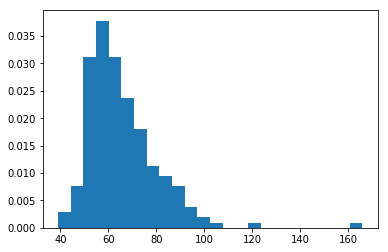

In [137]:
plt.hist(weight,bins=24,normed=True)

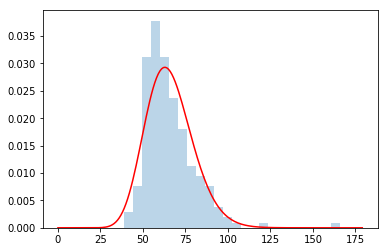

In [138]:
import math 

samp = np.array(df["weight"])
g_list =[]
k = kml
s = sml

#ガンマ分布の当てはめ
# gamma分布　確率密度関数より
def _gamma(x,k,s):
    return 1/(s*math.gamma(k))*((x/s)**(k-1))*math.exp(-x/s)

g_list=[_gamma(i,k,s) for i in range(180) ]

plt.plot(g_list, color='red')
plt.hist(samp, bins=24, density=1,alpha=.3)

plt.show()


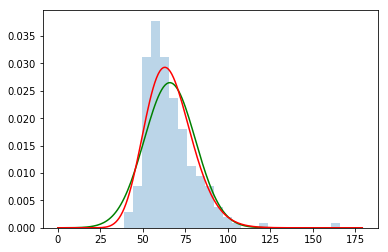

In [139]:
def _gauss(x, mu, sig2):
    return 1/math.sqrt(2*math.pi*sig2)*math.exp(-1/(2*sig2)*(x-mu)**2)

samp = np.array(df["weight"])
sig2 = 226.7
mu = 65.8

gs_list=[_gauss(i,mu,sig2) for i in range(180)]

plt.plot(gs_list, color='green')
plt.plot(g_list, color='red')
plt.hist(samp, bins=24, density=1,alpha=.3)

plt.show()

4.370714232191238 36.43150139478212 6.719381127398536


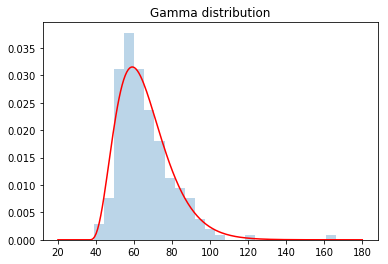

In [140]:
# locも含めた分布のフィッティング
samp = np.array(df["weight"])

fit_alpha, fit_loc, fit_beta = stats.gamma.fit(samp)
print( fit_alpha, fit_loc, fit_beta )
x = np.linspace(20,180,200)

plt.figure()
# fitted distribution
pdf_fitted = stats.gamma.pdf(x, fit_alpha, loc=fit_loc, scale=fit_beta)
plt.title('Gamma distribution')
plt.plot(x,pdf_fitted,'r-')
plt.hist(samp, bins=24, density=1,alpha=.3)
plt.show()

# こっちのほうがフィットしている

(array([0.00283465, 0.00755906, 0.0311811 , 0.03779528, 0.0311811 ,
        0.02362205, 0.01795276, 0.01133858, 0.00944882, 0.00755906,
        0.00377953, 0.00188976, 0.00094488, 0.        , 0.        ,
        0.00094488, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00094488]),
 array([ 39.        ,  44.29166667,  49.58333333,  54.875     ,
         60.16666667,  65.45833333,  70.75      ,  76.04166667,
         81.33333333,  86.625     ,  91.91666667,  97.20833333,
        102.5       , 107.79166667, 113.08333333, 118.375     ,
        123.66666667, 128.95833333, 134.25      , 139.54166667,
        144.83333333, 150.125     , 155.41666667, 160.70833333,
        166.        ]),
 <a list of 24 Patch objects>)

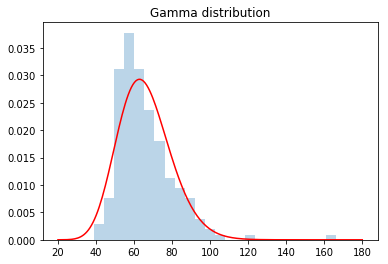

In [141]:
# fitdistrによるフィッティング結果
fit_alpha = 22.48548
fit_loc = 0
fit_beta = 2.926333 
x = np.linspace(20,180,200)

plt.figure()
# fitted distribution
pdf_fitted = stats.gamma.pdf(x, fit_alpha, loc=fit_loc, scale=fit_beta)
plt.title('Gamma distribution')
plt.plot(x,pdf_fitted,'r-')
plt.hist(samp,bins=24, density=1,alpha=.3)

In [182]:
a = df["weight"]/smo - (kmo -1)* np.log( df["weight"]/smo )

In [185]:
th = sorted(a, reverse=True)[int(0.01*N-1)]

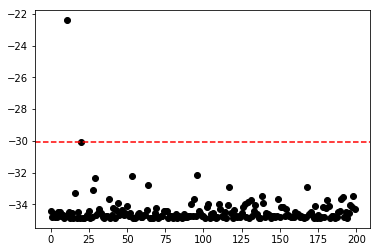

In [181]:
plt.plot(a,'ko')
plt.axhline(y = th, color="red", linestyle="dashed")
plt.show()

In [187]:
a[a > th]

11   -22.389395
Name: weight, dtype: float64